目录

* [逻辑斯蒂回归](#逻辑斯蒂回归)
* [加正则项的逻辑斯蒂回归](#加正则项的逻辑斯蒂回归)

# 逻辑斯蒂回归

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

手动实现sigmoid函数

In [5]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

手动实现损失函数的计算

In [6]:
# 计算损失函数
def compute_loss(theta, X, y):
    if np.ndim(theta) == 1:
        theta = theta[:, np.newaxis]
    z_x = X.dot(theta) # h=θ^T dot X=θ0*x0+θ1*x1
    # print(z_x.shape) # (100,3)x(3,1)=>(100,1)
    h_x = sigmoid(z_x) # =>(100,1)

    m = y.size # 100，用于对loss求平均
    J_loss = -1./m * (np.log(h_x).T.dot(y) + np.log(1-h_x).T.dot(1-y)) # =>(1,1)
    if np.isnan(J_loss):
        return np.inf
    return J_loss[0][0]

加载数据

数据集简要说明

多元变量（二元），数据共有3列。

前2列表示2个exam score，由2个考试分数共同决定该条样本是“通过考试”还是“没通过”考试

第3列0表示没通过，1表示通过

data shape: (100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


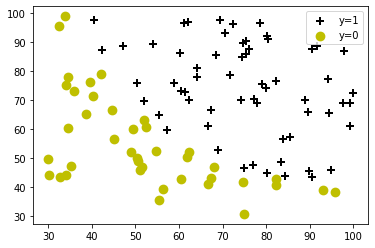

In [2]:
# 绘制数据点，便于查看数据分布
def plot_data(data, label_pos, label_neg, axes=None):
    # 获取正负样本的index
    pos = data[:,2] == 1
    neg = data[:,2] == 0

    if axes is None:
        axes = plt.gca()

    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, linewidth=2, label=label_neg)
    axes.legend()

cwd = '/home/xijian/pycharm_projects/Magic-NLPer/MachineLearning/'
data_dir = cwd+'LogisticRegression逻辑斯蒂回归/data/'

data = np.loadtxt(data_dir+'data1.txt', delimiter=',')
print('data shape:', data.shape) # (100,3)
print(data[:5])
plot_data(data, 'y=1', 'y=0')

查看一下$\theta$ =[0, 0]时的loss：

In [3]:
# 把θ0与x0=[1,1,...,1] 与特征x1,x2,..一起组成一个大X
X = np.c_[np.ones(data.shape[0]), data[:,0:2]]
print(X[:5], X.shape) # (100, 3)
y = np.c_[data[:,2]]
print(y[:5], y.shape) # (100,1)

loss = compute_loss(np.array([[0],[0],[0]]), X, y)
print('\nloss:', loss)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]] (100, 3)
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]] (100, 1)


NameError: name 'compute_loss' is not defined

手动实现梯度计算

In [7]:
# 计算梯度
def compute_gradient(theta, X, y):
    if np.ndim(theta) == 1:
        theta = theta[:, np.newaxis]
    # 计算model输出
    z_x = X.dot(theta) # θ^T dot X=θ0*x0+θ1*x1
    # print(z_x.shape) # (100,3)x(3,1)=>(100,1)
    h_x = sigmoid(z_x) # =>(100,1)

    m = y.size # 100 对应loss中求平均时的m

    # 计算梯度并更新参数 X.T.dot(h_x-y):(3,100)x(100,1)=>(3,1)
    grad = 1./m * X.T.dot(h_x-y) # (3,1)
    return grad.flatten() # (3,)


initial_theta = np.zeros(X.shape[1]) # (3,)
initial_theta = initial_theta[:, np.newaxis] # (3,1)
print(initial_theta.shape) # (3,1)

loss = compute_loss(initial_theta, X, y)
grad = compute_gradient(initial_theta, X, y)

print('loss:', loss)
print('grad:', grad)

(3, 1)
loss: 0.6931471805599453
grad: [ -0.1        -12.00921659 -11.26284221]


使用梯度下降求解参数，利用scipy.optimize.minimize()函数，指定最小化的目标即损失函数的计算，
然后是梯度的计算，优化参数theta，输入输出(X, y)，即可实现最小化损失函数。

In [8]:
from scipy.optimize import minimize
res = minimize(compute_loss, initial_theta, args=(X,y),
               jac=compute_gradient, options={'maxiter':400})
res

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557620e-09,  4.36433485e-07, -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [9]:
# 查看最后优化得到的参数theta的值
final_updated_theta = res.x
print('theta:', final_updated_theta, final_updated_theta.shape) # (3,)

theta: [-25.16131634   0.2062316    0.20147143] (3,)


根据求解出的参数$\theta$绘制出决策边界：

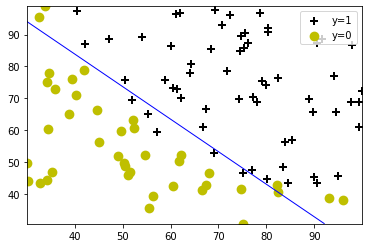

In [10]:
# 绘制决策边界
# 边界：
x1_min, x1_max = X[:,1].min(), X[:,1].max() # 注意X[0]是常数列[1,1,...,1]
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # 生成网格坐标
# print(xx1.shape, xx2.shape) # (50, 50) (50, 50)
XX = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
# print(XX.shape) # (2500, 3)
z_x = XX.dot(final_updated_theta) # (2500, 3)x(3,)=>(2500,)
h_x = sigmoid(z_x)
h_x = h_x.reshape(xx1.shape) # (50,50)
# print(h_x.shape)
plt.contour(xx1, xx2, h_x, [0.5], linewidths=1, colors='b') # 决策边界

plot_data(data, 'y=1', 'y=0') # # 样本数据点
plt.legend(loc=1)

# 加正则项的逻辑斯蒂回归

加正则项的逻辑斯蒂回归的损失函数手动实现

In [11]:
# 计算损失函数
def compute_loss_reg(theta, reg, *args):
    if np.ndim(theta) == 1:
        theta = theta[:, np.newaxis] # (28,)=>(28,1)
    XX, y = args
    z_x = XX.dot(theta) # h=θ^T dot X=θ0*x0+θ1*x1
    # print(z_x.shape) # (118,28)x(28,1)=>(118,1)
    h_x = sigmoid(z_x) # =>(118,1)

    m = y.size # 118 用于求平均损失
    J_loss = -1./m * (np.log(h_x).T.dot(y) + np.log(1-h_x).T.dot(1-y)) # =>(1,1)
    # 注意：正则项的求和中j是从1开始的，而不是0，因为约束的是特征，而\theta_0对应的是x_0=1常数项
    reg_item = reg/(2.*m) * np.sum(np.square(theta[:,0][1:]))
    J_loss = J_loss + reg_item
    if np.isnan(J_loss):
        return np.inf
    return J_loss[0][0]

加正则项的梯度计算的手动实现

In [12]:
# 计算梯度
def compute_gradient_reg(theta, reg, *args):
    if np.ndim(theta) == 1:
        theta = theta[:, np.newaxis] # (28,)=>(28,1)
    XX, y = args
    # 计算model输出
    z_x = XX.dot(theta) # θ^T dot X=θ0*x0+θ1*x1
    # print(z_x.shape) # (118,28)x(28,1)=>(118,1)
    h_x = sigmoid(z_x) # =>(118,1)

    m = y.size # 118 对应于平均损失中的m

    # 计算梯度并更新参数 X.T.dot(h_x-y):(28,118)x(118,1)=>(28,1)
    grad = 1./m * XX.T.dot(h_x-y) # (28,1)

    reg_item = reg/m * np.r_[ [[0]], theta[1:] ] # (1,1) 行拼接 (27,1)=>(28,1)
    grad = grad + reg_item # (28,1)
    return grad.flatten() # (28,)

加载数据

数据集简要说明

多元变量（二元），数据共有3列。

前2列表示2个Microchip Test的值，由2个测试结果共同决定该芯片是“通过”还是“没通过”测试

第3列0表示没通过，1表示通过

数据分布是非线性的

data shape: (118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


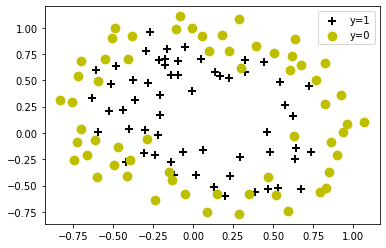

In [13]:
data2 = np.loadtxt(data_dir+'data2.txt', delimiter=',')
print('data shape:', data2.shape) # (100,3)
print(data2[:5])
plot_data(data2, 'y=1', 'y=0')

可见该数据不是直接线性可分的，不能直接使用逻辑斯蒂回归。考虑在“线性回归原理小结”中提到“多项式回归”，
这里使用“多项式特征”（sklearn.preprocessing.PolynomialFeatures）对原始数据X XX进行特征转化，对转化后的数据X ′ X'X
′再使用逻辑斯蒂回归。由于数据比之前的复杂，这次便可在学习时加入正则项以避免过拟合。

In [14]:
X = data2[:, 0:2]
y = np.c_[data2[:,2]]
print(X.shape, y.shape) # (118, 2) (118, 1)

poly = PolynomialFeatures(6) # 最高次项为6次
XX = poly.fit_transform(X) # X是有2个特征，XX有28个特征（含组合特征）
XX.shape # (118, 28)
# 0次项：1个，1次项：2个，2次项：3个（x1^2,x2^2,x1x2），3次项：4个
# 4次项：5个，5次项：6个，6次项：7个，一共28个特征

initial_theta = np.zeros(XX.shape[1]) # (28,)
initial_theta = initial_theta[:, np.newaxis]
print(initial_theta.shape) # (28,1)

loss = compute_loss_reg(initial_theta, 1, XX, y)
grad = compute_gradient_reg(initial_theta, 1, XX, y)

print('loss:', loss)
print('grad:', grad)

(118, 2) (118, 1)
(28, 1)
loss: 0.6931471805599454
grad: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


绘制决策边界，并查看不同的正则化项系数，对于决策边界的影响

- lambda = 0 : 就是没有正则化，此时会容易过拟合
- lambda = 1 : 合适的正则化项系数
- lambda = 100 : 正则化项太激进，导致基本没拟合出决策边界

(3,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


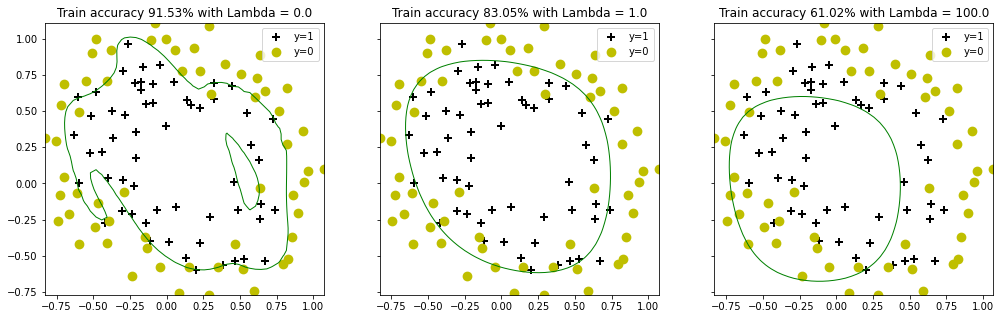

In [15]:
# 预测
def predict(theta, X, threshold=0.5):
    z_x = X.dot(theta) # (b,3)x(3,1)=>(b,1)
    h_x = sigmoid(z_x) # (b,1)
    pred = h_x >= threshold
    return pred.astype('int') # (b,1) b个样本的预测结果


fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17,5))
print(axes.shape) # (3,)

lambda_list = [0., 1., 100.]
for i,C in enumerate(lambda_list):
    # 最小化损失
    res2 = minimize(compute_loss_reg, initial_theta, args=(C,XX,y),
               jac=compute_gradient_reg, options={'maxiter':3000})
    final_updated_theta = res2.x # (28,)
    # print('theta:', final_updated_theta.shape) # (28,)

    # 计算准确率 XX:(118, 28) y:(118, 1) theta:=>(28,1)
    pred = predict(final_updated_theta.reshape(-1,1), XX) # (118,1)
    # print(pred.shape) # (118,1)
    accuracy = 100. * sum(pred.ravel() == y.ravel()) / y.size

    # 绘制原始数据分布
    plot_data(data2, 'y=1', 'y=0', axes=axes.flatten()[i])

    # 绘制决策边界 X:(118,2) y:(118,1)
    # 边界：
    x1_min, x1_max = X[:,0].min(), X[:,0].max() # 注意这里的X不含常数列[1,1,...,1]
    x2_min, x2_max = X[:,1].min(), X[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # 生成网格坐标
    # print(xx1.shape, xx2.shape) # (50, 50) (50, 50)
    X_ = np.c_[xx1.ravel(), xx2.ravel()]
    # print(X_.shape) # (2500,2) # 没算常数列

    XX_ = poly.fit_transform(X_) # (2500,28)
    # print(XX_.shape) # (2500,28)
    z_x = XX_.dot(final_updated_theta) # (2500, 28)x(28,)=>(2500,)
    h_x = sigmoid(z_x) # (2500,)
    h_x = h_x.reshape(xx1.shape) # (50,50)
    #print(h_x.shape) # (50,50)

    axes.flatten()[i].contour(xx1, xx2, h_x, [0.5], linewidths=1, colors='g') # 决策边界
    # 设置标题
    axes.flatten()[i].set_title('Train accuracy {:.2f}% with Lambda = {}'.format(accuracy, C))